# Simple outlier detection

Code by Nejc Znidar

First we import the packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

Let us load the train data:

In [2]:
def load_train_data():
    mydata = pd.read_csv('train.csv') ### I have prepared it under CSV file, otherwise it would be opened as .gz.
    return (mydata)

In [3]:
data = load_train_data()

In [4]:
data

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40428962,9.998753e+18,1,14103023,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,17262,320,50,1872,3,39,100173,23
40428963,9.999038e+18,0,14103023,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,...,1,2,23160,320,50,2667,0,47,-1,221
40428964,9.999585e+18,0,14103023,1005,1,f61eaaae,6b59f079,f028772b,ecad2386,7801e8d9,...,1,0,20969,320,50,2372,0,813,-1,46
40428965,9.999636e+18,1,14103023,1005,0,85f751fd,c4e18dd6,50e219e0,3c4b944d,2347f47a,...,1,0,16859,320,50,1887,3,39,100194,23


Extract some basic information about the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40428967 entries, 0 to 40428966
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                float64
 1   click             int64  
 2   hour              int64  
 3   C1                int64  
 4   banner_pos        int64  
 5   site_id           object 
 6   site_domain       object 
 7   site_category     object 
 8   app_id            object 
 9   app_domain        object 
 10  app_category      object 
 11  device_id         object 
 12  device_ip         object 
 13  device_model      object 
 14  device_type       int64  
 15  device_conn_type  int64  
 16  C14               int64  
 17  C15               int64  
 18  C16               int64  
 19  C17               int64  
 20  C18               int64  
 21  C19               int64  
 22  C20               int64  
 23  C21               int64  
dtypes: float64(1), int64(14), object(9)
memory usage: 7.2+ GB


# Task 1

There is a difference if we want to show CTR by hour for every available hour or do we aggregate it on one day and show average values for a day. Looking at unique values for every hour in dataset is in graph below, in a graph after that we can see the average CTR per hour where average it over whole sample and we just look at representative day.

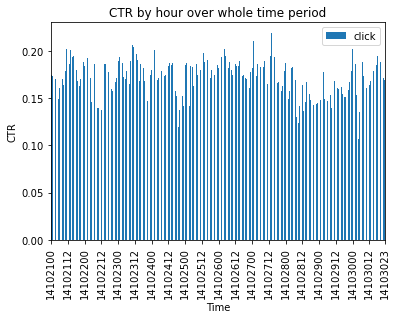

In [6]:
aggregate_by_hour = data[['hour','click']].groupby('hour').mean()
myticks = [k*12 for k in list(range(20))]
myticks.append(239)
ticklabels = [aggregate_by_hour.index[k*12] for k in list(range(20))]
ticklabels.append(aggregate_by_hour.index[239])
ax = aggregate_by_hour.plot(kind="bar", title="CTR by hour over whole time period",xlabel = "Time",ylabel="CTR",
                            xticks = myticks)

_ = ax.set_xticklabels(ticklabels,rotation="vertical")


<AxesSubplot:title={'center':'CTR by hour (average)'}, xlabel='Time', ylabel='CTR'>

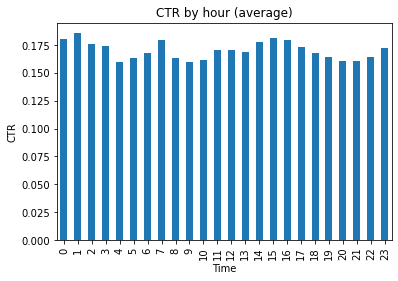

In [7]:
data['only_hour'] = data['hour'] % 100 
aggregate_by_dayhour = data[['only_hour','click']].groupby('only_hour').mean()
aggregate_by_dayhour.plot(kind="bar", title="CTR by hour (average)",xlabel = "Time",ylabel="CTR",legend=False)


# Task 2

Moving average should be done on CTR, which changes over time. Other variables are categorical.
Regarding the number of hours we take into account, there was no specification. So, we will take all time points into account.

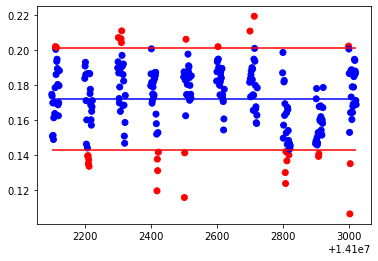

In [8]:
sd = aggregate_by_hour.std().values
### Create scatterplot over time points:
average = aggregate_by_hour.mean().values[0]
upper_bound = average + sd*1.5
lower_bound = average - sd*1.5

### Now let's do the plotting!
y = aggregate_by_hour.values
kcolors = ['red' if abs(value - average) > sd*1.5 else 'blue' for value in y]
plt.scatter(aggregate_by_hour.index,y, color = kcolors)
plt.hlines(average,aggregate_by_hour.index[0],aggregate_by_hour.index[-1],colors="blue")
plt.hlines(upper_bound,aggregate_by_hour.index[0],aggregate_by_hour.index[-1],colors="red")
plt.hlines(lower_bound,aggregate_by_hour.index[0],aggregate_by_hour.index[-1],colors="red")


In above plot, red lines are 1.5* standard deviation line. Also, red dots represent outliers.